# Data Preprocessing

Data Frame Dictionary

df: original data frame imported from the techSalaries2017.csv file

df1: original dropped all rows containing null values

df2: df1 plus the 6 standaradized quantitative variable columns

df3: df2 plus the 3 gender dummy variable columns

df4: df3 plus the 12 zodiac dummy variable columns

df5: df4 plus the 4 standardized outcome variable columns

df6: df5 plus all the standardized dummy variable columns

df7: df6 without the 'other' gender rows plus the coded gender column (only for question 4)

df8: df6 with a new column of categorical variable of whether or not pay is higher than median (only for question 5)

Predictive Variables List Dictionary (Column Names)

predict_vars: all 6 standardized quantitative variables and all dummy variables for all 4 qualitative variables (race, gender, education, zodiac)

predict_vars1: predict_vars without 'standardized_Race_Two_Or_More'

predict_vars2: predict_vars1 without 'standardized_Other_Gender'

predict_vars3: predict_vars2 without 'standardized_Some_College'

predict_vars4: predict_vars3 without a random selected zodiac (standardized)

predict_vars5: predict_vars4 without 'standardized_Male' and 'standardized_Female' and with 'standardized_totalyearlycompensation' (only for question 4)

predict_vars6: all 6 standardized quantitative variables (only for question 5)

Importing libraries

In [1]:
# Import the libraries
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import random
import statsmodels.api as sm

# import precision recall curve
from sklearn.metrics import precision_recall_curve

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix, precision_score, recall_score, roc_curve, roc_auc_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression

Processing df

In [2]:
# Read the CSV file and set the first row as the header
df = pd.read_csv('techSalaries2017.csv', header=0)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62642 entries, 0 to 62641
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   company                  62637 non-null  object 
 1   title                    62642 non-null  object 
 2   location                 62642 non-null  object 
 3   totalyearlycompensation  62642 non-null  int64  
 4   basesalary               62642 non-null  int64  
 5   stockgrantvalue          62642 non-null  float64
 6   bonus                    62642 non-null  float64
 7   yearsofexperience        62642 non-null  float64
 8   yearsatcompany           62642 non-null  float64
 9   gender                   43102 non-null  object 
 10  Masters_Degree           62642 non-null  int64  
 11  Bachelors_Degree         62642 non-null  int64  
 12  Doctorate_Degree         62642 non-null  int64  
 13  Highschool               62642 non-null  int64  
 14  Some_College          

,company,title,location,totalyearlycompensation,basesalary,stockgrantvalue,bonus,yearsofexperience,yearsatcompany,gender,...,Race_Two_Or_More,Race_Black,Race_Hispanic,Race,Education,Age,Height,Zodiac,SAT,GPA
0,Oracle,Product Manager,"Redwood City, CA",127000,107000,20000.0,10000.0,1.5,1.5,NaN,...,0,0,0,NaN,NaN,38,68.590,5,829,2.13
1,eBay,Software Engineer,"San Francisco, CA",100000,0,0.0,0.0,5.0,3.0,NaN,...,0,0,0,NaN,NaN,34,68.059,7,993,2.77
2,Amazon,Product Manager,"Seattle, WA",310000,155000,0.0,0.0,8.0,0.0,NaN,...,0,0,0,NaN,NaN,42,61.343,3,1200,3.26
3,Apple,Software Engineering Manager,"Sunnyvale, CA",372000,157000,180000.0,35000.0,7.0,5.0,NaN,...,0,0,0,NaN,NaN,28,66.495,3,1170,3.07
4,Microsoft,Software Engineer,"Mountain View, CA",157000,0,0.0,0.0,5.0,3.0,NaN,...,0,0,0,NaN,NaN,34,69.015,2,1115,2.91


In [3]:
# Create a new DataFrame without rows containing any null values
df1 = df.dropna()
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21589 entries, 15710 to 61991
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   company                  21589 non-null  object 
 1   title                    21589 non-null  object 
 2   location                 21589 non-null  object 
 3   totalyearlycompensation  21589 non-null  int64  
 4   basesalary               21589 non-null  int64  
 5   stockgrantvalue          21589 non-null  float64
 6   bonus                    21589 non-null  float64
 7   yearsofexperience        21589 non-null  float64
 8   yearsatcompany           21589 non-null  float64
 9   gender                   21589 non-null  object 
 10  Masters_Degree           21589 non-null  int64  
 11  Bachelors_Degree         21589 non-null  int64  
 12  Doctorate_Degree         21589 non-null  int64  
 13  Highschool               21589 non-null  int64  
 14  Some_College           

In [4]:
# Create the list of column names that need to be standardized
columns_to_standardize = []
columns_to_standardize_indexes = [8,9,23,24,26,27]
for i in columns_to_standardize_indexes:
    columns_to_standardize.append(df.columns[i-1])
print('Columns to standardize:', columns_to_standardize)

Columns to standardize: ['yearsofexperience', 'yearsatcompany', 'Age', 'Height', 'SAT', 'GPA']


In [5]:
# Add the 6 standardized quantitative predictor variables
df2 = df1.copy()
for i in columns_to_standardize:
    df2[f'standardized_{i}'] = stats.zscore(df2[i])
df2.head()

,company,title,location,totalyearlycompensation,basesalary,stockgrantvalue,bonus,yearsofexperience,yearsatcompany,gender,...,Height,Zodiac,SAT,GPA,standardized_yearsofexperience,standardized_yearsatcompany,standardized_Age,standardized_Height,standardized_SAT,standardized_GPA
15710,Google,Software Engineer,"Sunnyvale, CA",400000,210000,145000.0,45000.0,5.0,5.0,Male,...,68.891,9,1166,3.04,-0.362949,0.690698,0.845831,0.631022,0.798890,0.493200
23532,Microsoft,Software Engineer,"Redmond, WA",136000,124000,1000.0,11000.0,3.0,2.0,Male,...,61.454,12,1175,3.07,-0.704978,-0.211570,-1.419236,-1.845058,0.875526,0.600966
23533,Google,Software Engineer,"San Bruno, CA",337000,177000,125000.0,36000.0,6.0,6.0,Male,...,65.455,1,1268,3.34,-0.191935,0.991454,-1.311376,-0.512962,1.667427,1.570862
23534,Microsoft,Software Engineer,"Seattle, WA",222000,164000,38000.0,20000.0,4.0,4.0,Male,...,73.769,8,1070,2.75,-0.533964,0.389942,-0.556353,2.255106,-0.018555,-0.548540
23535,Blend,Software Engineer,"San Francisco, CA",187000,165000,22000.0,0.0,5.0,0.0,Male,...,68.710,2,1187,3.23,-0.362949,-0.813081,-0.879934,0.570759,0.977707,1.175719


In [6]:
# Inspect the 'gender' column to see different values it contains
# in order to create the dummy variable columns next
df2['gender'].value_counts()

gender
Male      17603
Female     3880
Other       106
Name: count, dtype: int64

In [7]:
# Create dummy variables for the gender column
gender_dummy_df = pd.get_dummies(df2['gender']).astype(int)

# Concatenate the dummy variables to the original DataFrame
df3 = pd.concat([df2, gender_dummy_df], axis=1)

df3.rename(columns={'Other': 'Other_Gender'}, inplace=True)

df3.head()

,company,title,location,totalyearlycompensation,basesalary,stockgrantvalue,bonus,yearsofexperience,yearsatcompany,gender,...,GPA,standardized_yearsofexperience,standardized_yearsatcompany,standardized_Age,standardized_Height,standardized_SAT,standardized_GPA,Female,Male,Other_Gender
15710,Google,Software Engineer,"Sunnyvale, CA",400000,210000,145000.0,45000.0,5.0,5.0,Male,...,3.04,-0.362949,0.690698,0.845831,0.631022,0.798890,0.493200,0,1,0
23532,Microsoft,Software Engineer,"Redmond, WA",136000,124000,1000.0,11000.0,3.0,2.0,Male,...,3.07,-0.704978,-0.211570,-1.419236,-1.845058,0.875526,0.600966,0,1,0
23533,Google,Software Engineer,"San Bruno, CA",337000,177000,125000.0,36000.0,6.0,6.0,Male,...,3.34,-0.191935,0.991454,-1.311376,-0.512962,1.667427,1.570862,0,1,0
23534,Microsoft,Software Engineer,"Seattle, WA",222000,164000,38000.0,20000.0,4.0,4.0,Male,...,2.75,-0.533964,0.389942,-0.556353,2.255106,-0.018555,-0.548540,0,1,0
23535,Blend,Software Engineer,"San Francisco, CA",187000,165000,22000.0,0.0,5.0,0.0,Male,...,3.23,-0.362949,-0.813081,-0.879934,0.570759,0.977707,1.175719,0,1,0


In [8]:
# Create dummy variables for the Zodiac column
zodiac_dummy_df = pd.get_dummies(df3['Zodiac']).astype(int)

# Rename the columns to match the respective zodiac signs
zodiac_signs = {
    1: 'Aries',
    2: 'Taurus',
    3: 'Gemini',
    4: 'Cancer',
    5: 'Leo',
    6: 'Virgo',
    7: 'Libra',
    8: 'Scorpio',
    9: 'Sagittarius',
    10: 'Capricorn',
    11: 'Aquarius',
    12: 'Pisces'
}

zodiac_dummy_df.rename(columns={i: zodiac_signs[i] for i in range(1, 13)}, inplace=True)

# Concatenate the dummy variables DataFrame with the original DataFrame
df4 = pd.concat([df3, zodiac_dummy_df], axis=1)

df4.head()

,company,title,location,totalyearlycompensation,basesalary,stockgrantvalue,bonus,yearsofexperience,yearsatcompany,gender,...,Gemini,Cancer,Leo,Virgo,Libra,Scorpio,Sagittarius,Capricorn,Aquarius,Pisces
15710,Google,Software Engineer,"Sunnyvale, CA",400000,210000,145000.0,45000.0,5.0,5.0,Male,...,0,0,0,0,0,0,1,0,0,0
23532,Microsoft,Software Engineer,"Redmond, WA",136000,124000,1000.0,11000.0,3.0,2.0,Male,...,0,0,0,0,0,0,0,0,0,1
23533,Google,Software Engineer,"San Bruno, CA",337000,177000,125000.0,36000.0,6.0,6.0,Male,...,0,0,0,0,0,0,0,0,0,0
23534,Microsoft,Software Engineer,"Seattle, WA",222000,164000,38000.0,20000.0,4.0,4.0,Male,...,0,0,0,0,0,1,0,0,0,0
23535,Blend,Software Engineer,"San Francisco, CA",187000,165000,22000.0,0.0,5.0,0.0,Male,...,0,0,0,0,0,0,0,0,0,0


In [9]:
# Create the list of column names that need to be standardized
columns_to_standardize_outcome = df4.columns[3:7].tolist()
print(columns_to_standardize_outcome)

['totalyearlycompensation', 'basesalary', 'stockgrantvalue', 'bonus']


In [10]:
# Add the 4 standardized outcome variables
df5 = df4.copy()
for i in columns_to_standardize_outcome:
    df5[f'standardized_{i}'] = stats.zscore(df5[i])
df5.head()

,company,title,location,totalyearlycompensation,basesalary,stockgrantvalue,bonus,yearsofexperience,yearsatcompany,gender,...,Libra,Scorpio,Sagittarius,Capricorn,Aquarius,Pisces,standardized_totalyearlycompensation,standardized_basesalary,standardized_stockgrantvalue,standardized_bonus
15710,Google,Software Engineer,"Sunnyvale, CA",400000,210000,145000.0,45000.0,5.0,5.0,Male,...,0,0,1,0,0,0,1.518838,1.330675,1.381717,1.059804
23532,Microsoft,Software Engineer,"Redmond, WA",136000,124000,1000.0,11000.0,3.0,2.0,Male,...,0,0,0,0,0,1,-0.464768,-0.172460,-0.605857,-0.295686
23533,Google,Software Engineer,"San Bruno, CA",337000,177000,125000.0,36000.0,6.0,6.0,Male,...,0,0,0,0,0,0,1.045478,0.753891,1.105665,0.700998
23534,Microsoft,Software Engineer,"Seattle, WA",222000,164000,38000.0,20000.0,4.0,4.0,Male,...,0,1,0,0,0,0,0.181407,0.526673,-0.095161,0.063120
23535,Blend,Software Engineer,"San Francisco, CA",187000,165000,22000.0,0.0,5.0,0.0,Male,...,0,0,0,0,0,0,-0.081571,0.544151,-0.316002,-0.734227


In [11]:
# Create a list of the column names of the dummy variables
columns_to_standardize_dummy = []

# 4 categorical/qualitative variables (dummy variables)
# for convenient reference, the sequence is kept consisent of: race, gender, education, zodiac

# Race
columns_to_standardize_dummy.extend(df5.columns[15:20])

# gender
columns_to_standardize_dummy.extend(df5.columns[33:36])

# Education
columns_to_standardize_dummy.extend(df5.columns[10:15])

# Zodiac
columns_to_standardize_dummy.extend(df5.columns[36:-4])

print(columns_to_standardize_dummy)

['Race_Asian', 'Race_White', 'Race_Two_Or_More', 'Race_Black', 'Race_Hispanic', 'Female', 'Male', 'Other_Gender', 'Masters_Degree', 'Bachelors_Degree', 'Doctorate_Degree', 'Highschool', 'Some_College', 'Aries', 'Taurus', 'Gemini', 'Cancer', 'Leo', 'Virgo', 'Libra', 'Scorpio', 'Sagittarius', 'Capricorn', 'Aquarius', 'Pisces']


In [12]:
# Add the standardized dummy variables
df6 = df5.copy()
for i in columns_to_standardize_dummy:
    df6[f'standardized_{i}'] = stats.zscore(df6[i])
df6.head()

,company,title,location,totalyearlycompensation,basesalary,stockgrantvalue,bonus,yearsofexperience,yearsatcompany,gender,...,standardized_Gemini,standardized_Cancer,standardized_Leo,standardized_Virgo,standardized_Libra,standardized_Scorpio,standardized_Sagittarius,standardized_Capricorn,standardized_Aquarius,standardized_Pisces
15710,Google,Software Engineer,"Sunnyvale, CA",400000,210000,145000.0,45000.0,5.0,5.0,Male,...,-0.303055,-0.301504,-0.300497,-0.305508,-0.304238,-0.298845,3.308690,-0.299121,-0.29654,-0.302326
23532,Microsoft,Software Engineer,"Redmond, WA",136000,124000,1000.0,11000.0,3.0,2.0,Male,...,-0.303055,-0.301504,-0.300497,-0.305508,-0.304238,-0.298845,-0.302234,-0.299121,-0.29654,3.307691
23533,Google,Software Engineer,"San Bruno, CA",337000,177000,125000.0,36000.0,6.0,6.0,Male,...,-0.303055,-0.301504,-0.300497,-0.305508,-0.304238,-0.298845,-0.302234,-0.299121,-0.29654,-0.302326
23534,Microsoft,Software Engineer,"Seattle, WA",222000,164000,38000.0,20000.0,4.0,4.0,Male,...,-0.303055,-0.301504,-0.300497,-0.305508,-0.304238,3.346218,-0.302234,-0.299121,-0.29654,-0.302326
23535,Blend,Software Engineer,"San Francisco, CA",187000,165000,22000.0,0.0,5.0,0.0,Male,...,-0.303055,-0.301504,-0.300497,-0.305508,-0.304238,-0.298845,-0.302234,-0.299121,-0.29654,-0.302326


In [13]:
# Add a column coding for gender
# This df is only used for question 4
df7 = df6.copy()

# Filter out rows where either 'Male' or 'Female' is 1
df7 = df7[(df7['Male'] == 1) | (df7['Female'] == 1)]

# Create 'gender_num' column based on 'Female'
df7['gender_num'] = df7['Female']

# Replace 0s with NaNs for rows where 'Female' is 0
df7.loc[df7['gender_num'] == 0, 'gender_num'] = pd.NA

# Fill NaNs with 0
df7['gender_num'] = df7['gender_num'].fillna(0)

# Convert to int
df7['gender_num'] = df7['gender_num'].astype(int)

df7.head()

,company,title,location,totalyearlycompensation,basesalary,stockgrantvalue,bonus,yearsofexperience,yearsatcompany,gender,...,standardized_Cancer,standardized_Leo,standardized_Virgo,standardized_Libra,standardized_Scorpio,standardized_Sagittarius,standardized_Capricorn,standardized_Aquarius,standardized_Pisces,gender_num
15710,Google,Software Engineer,"Sunnyvale, CA",400000,210000,145000.0,45000.0,5.0,5.0,Male,...,-0.301504,-0.300497,-0.305508,-0.304238,-0.298845,3.308690,-0.299121,-0.29654,-0.302326,0
23532,Microsoft,Software Engineer,"Redmond, WA",136000,124000,1000.0,11000.0,3.0,2.0,Male,...,-0.301504,-0.300497,-0.305508,-0.304238,-0.298845,-0.302234,-0.299121,-0.29654,3.307691,0
23533,Google,Software Engineer,"San Bruno, CA",337000,177000,125000.0,36000.0,6.0,6.0,Male,...,-0.301504,-0.300497,-0.305508,-0.304238,-0.298845,-0.302234,-0.299121,-0.29654,-0.302326,0
23534,Microsoft,Software Engineer,"Seattle, WA",222000,164000,38000.0,20000.0,4.0,4.0,Male,...,-0.301504,-0.300497,-0.305508,-0.304238,3.346218,-0.302234,-0.299121,-0.29654,-0.302326,0
23535,Blend,Software Engineer,"San Francisco, CA",187000,165000,22000.0,0.0,5.0,0.0,Male,...,-0.301504,-0.300497,-0.305508,-0.304238,-0.298845,-0.302234,-0.299121,-0.29654,-0.302326,0


In [14]:
# Add a new column of categorical variable of whether or not pay is higher than median to df6 (only for question 5)
df8 = df6.copy()

# Calculate the median
median_value = df8['standardized_totalyearlycompensation'].median()

# Drop rows where the value is equal to the median
df8 = df8[df8['standardized_totalyearlycompensation'] != median_value]

# Add a new column based on the condition
df8['higher'] = (df8['standardized_totalyearlycompensation'] > median_value).astype(int)

Processing column names

In [15]:
# Create a list of the columns to be used as predictors
predict_vars = df6.columns[27:33].tolist() + df6.columns[-25:].tolist()
print(predict_vars)

['standardized_yearsofexperience', 'standardized_yearsatcompany', 'standardized_Age', 'standardized_Height', 'standardized_SAT', 'standardized_GPA', 'standardized_Race_Asian', 'standardized_Race_White', 'standardized_Race_Two_Or_More', 'standardized_Race_Black', 'standardized_Race_Hispanic', 'standardized_Female', 'standardized_Male', 'standardized_Other_Gender', 'standardized_Masters_Degree', 'standardized_Bachelors_Degree', 'standardized_Doctorate_Degree', 'standardized_Highschool', 'standardized_Some_College', 'standardized_Aries', 'standardized_Taurus', 'standardized_Gemini', 'standardized_Cancer', 'standardized_Leo', 'standardized_Virgo', 'standardized_Libra', 'standardized_Scorpio', 'standardized_Sagittarius', 'standardized_Capricorn', 'standardized_Aquarius', 'standardized_Pisces']


In [16]:
# Inspect the 'Race' column to see which dummy variable to leave out
df6['Race'].value_counts()

Race
Asian          11414
White           7680
Hispanic        1067
Two Or More      766
Black            662
Name: count, dtype: int64

In [17]:
# Leave out the 'Race_Two_Or_More' column
predict_vars1 = predict_vars.copy()
predict_vars1.remove('standardized_Race_Two_Or_More')
print(predict_vars1)

['standardized_yearsofexperience', 'standardized_yearsatcompany', 'standardized_Age', 'standardized_Height', 'standardized_SAT', 'standardized_GPA', 'standardized_Race_Asian', 'standardized_Race_White', 'standardized_Race_Black', 'standardized_Race_Hispanic', 'standardized_Female', 'standardized_Male', 'standardized_Other_Gender', 'standardized_Masters_Degree', 'standardized_Bachelors_Degree', 'standardized_Doctorate_Degree', 'standardized_Highschool', 'standardized_Some_College', 'standardized_Aries', 'standardized_Taurus', 'standardized_Gemini', 'standardized_Cancer', 'standardized_Leo', 'standardized_Virgo', 'standardized_Libra', 'standardized_Scorpio', 'standardized_Sagittarius', 'standardized_Capricorn', 'standardized_Aquarius', 'standardized_Pisces']


In [18]:
# Inspect the 'gender' column to see which dummy variable to leave out
df6['gender'].value_counts()

gender
Male      17603
Female     3880
Other       106
Name: count, dtype: int64

In [19]:
# Leave out the 'Other_Gender' column
predict_vars2 = predict_vars1.copy()
predict_vars2.remove('standardized_Other_Gender')
print(predict_vars2)

['standardized_yearsofexperience', 'standardized_yearsatcompany', 'standardized_Age', 'standardized_Height', 'standardized_SAT', 'standardized_GPA', 'standardized_Race_Asian', 'standardized_Race_White', 'standardized_Race_Black', 'standardized_Race_Hispanic', 'standardized_Female', 'standardized_Male', 'standardized_Masters_Degree', 'standardized_Bachelors_Degree', 'standardized_Doctorate_Degree', 'standardized_Highschool', 'standardized_Some_College', 'standardized_Aries', 'standardized_Taurus', 'standardized_Gemini', 'standardized_Cancer', 'standardized_Leo', 'standardized_Virgo', 'standardized_Libra', 'standardized_Scorpio', 'standardized_Sagittarius', 'standardized_Capricorn', 'standardized_Aquarius', 'standardized_Pisces']


In [20]:
# Inspect the 'Education' column to see which dummy variable to leave out
df6['Education'].value_counts()

Education
Bachelor's Degree    10931
Master's Degree       9094
PhD                    924
Some College           339
Highschool             301
Name: count, dtype: int64

In [21]:
# Leave out the 'Some_College' column
predict_vars3 = predict_vars2.copy()
predict_vars3.remove('standardized_Some_College')
print(predict_vars3)

['standardized_yearsofexperience', 'standardized_yearsatcompany', 'standardized_Age', 'standardized_Height', 'standardized_SAT', 'standardized_GPA', 'standardized_Race_Asian', 'standardized_Race_White', 'standardized_Race_Black', 'standardized_Race_Hispanic', 'standardized_Female', 'standardized_Male', 'standardized_Masters_Degree', 'standardized_Bachelors_Degree', 'standardized_Doctorate_Degree', 'standardized_Highschool', 'standardized_Aries', 'standardized_Taurus', 'standardized_Gemini', 'standardized_Cancer', 'standardized_Leo', 'standardized_Virgo', 'standardized_Libra', 'standardized_Scorpio', 'standardized_Sagittarius', 'standardized_Capricorn', 'standardized_Aquarius', 'standardized_Pisces']


In [22]:
# Inspect the 'Zodiac' column to see which dummy variable to leave out
df6['Zodiac'].value_counts()

Zodiac
6     1843
1     1836
7     1829
3     1816
12    1808
9     1807
4     1799
5     1788
2     1775
10    1773
8     1770
11    1745
Name: count, dtype: int64

In [23]:
# Set a random state number
random.seed(3959)

# Randomly select one zodiac and leave it out
random_zodiac = random.choice(list(zodiac_signs.values()))
print('Dropped zodiac:', random_zodiac)

predict_vars4 = predict_vars3.copy()
predict_vars4.remove('standardized_'+random_zodiac)
print(predict_vars4)

Dropped zodiac: Pisces
['standardized_yearsofexperience', 'standardized_yearsatcompany', 'standardized_Age', 'standardized_Height', 'standardized_SAT', 'standardized_GPA', 'standardized_Race_Asian', 'standardized_Race_White', 'standardized_Race_Black', 'standardized_Race_Hispanic', 'standardized_Female', 'standardized_Male', 'standardized_Masters_Degree', 'standardized_Bachelors_Degree', 'standardized_Doctorate_Degree', 'standardized_Highschool', 'standardized_Aries', 'standardized_Taurus', 'standardized_Gemini', 'standardized_Cancer', 'standardized_Leo', 'standardized_Virgo', 'standardized_Libra', 'standardized_Scorpio', 'standardized_Sagittarius', 'standardized_Capricorn', 'standardized_Aquarius']


Finished processing

# Question 1


coefficients

In [24]:
# Multiple Linear Regression
X1 = df6[predict_vars4]  # Independent variables
y1 = df6['standardized_totalyearlycompensation']  # Dependent variable
X1 = sm.add_constant(X1)  # Add constant for intercept term
model1 = sm.OLS(y1, X1).fit()  # Fit the model
print(model1.summary()) # Print the summary

                                     OLS Regression Results                                     
Dep. Variable:     standardized_totalyearlycompensation   R-squared:                       0.267
Model:                                              OLS   Adj. R-squared:                  0.266
Method:                                   Least Squares   F-statistic:                     290.8
Date:                                  Sat, 02 Mar 2024   Prob (F-statistic):               0.00
Time:                                          22:10:38   Log-Likelihood:                -27281.
No. Observations:                                 21589   AIC:                         5.462e+04
Df Residuals:                                     21561   BIC:                         5.484e+04
Df Model:                                            27                                         
Covariance Type:                              nonrobust                                         
                              

In [25]:
# Print the coefficients
coefficients1 = model1.params[1:]
print('Coefficients:')
print(coefficients1)

Coefficients:
standardized_yearsofexperience    0.389090
standardized_yearsatcompany      -0.057771
standardized_Age                 -0.003621
standardized_Height              -0.005713
standardized_SAT                  0.257960
standardized_GPA                  0.014621
standardized_Race_Asian          -0.062167
standardized_Race_White          -0.046821
standardized_Race_Black          -0.023893
standardized_Race_Hispanic       -0.027377
standardized_Female              -0.086920
standardized_Male                -0.073509
standardized_Masters_Degree       0.102984
standardized_Bachelors_Degree     0.020393
standardized_Doctorate_Degree     0.150627
standardized_Highschool          -0.006619
standardized_Aries               -0.022104
standardized_Taurus              -0.013353
standardized_Gemini              -0.017391
standardized_Cancer              -0.016534
standardized_Leo                 -0.018279
standardized_Virgo               -0.015344
standardized_Libra               -0.0176

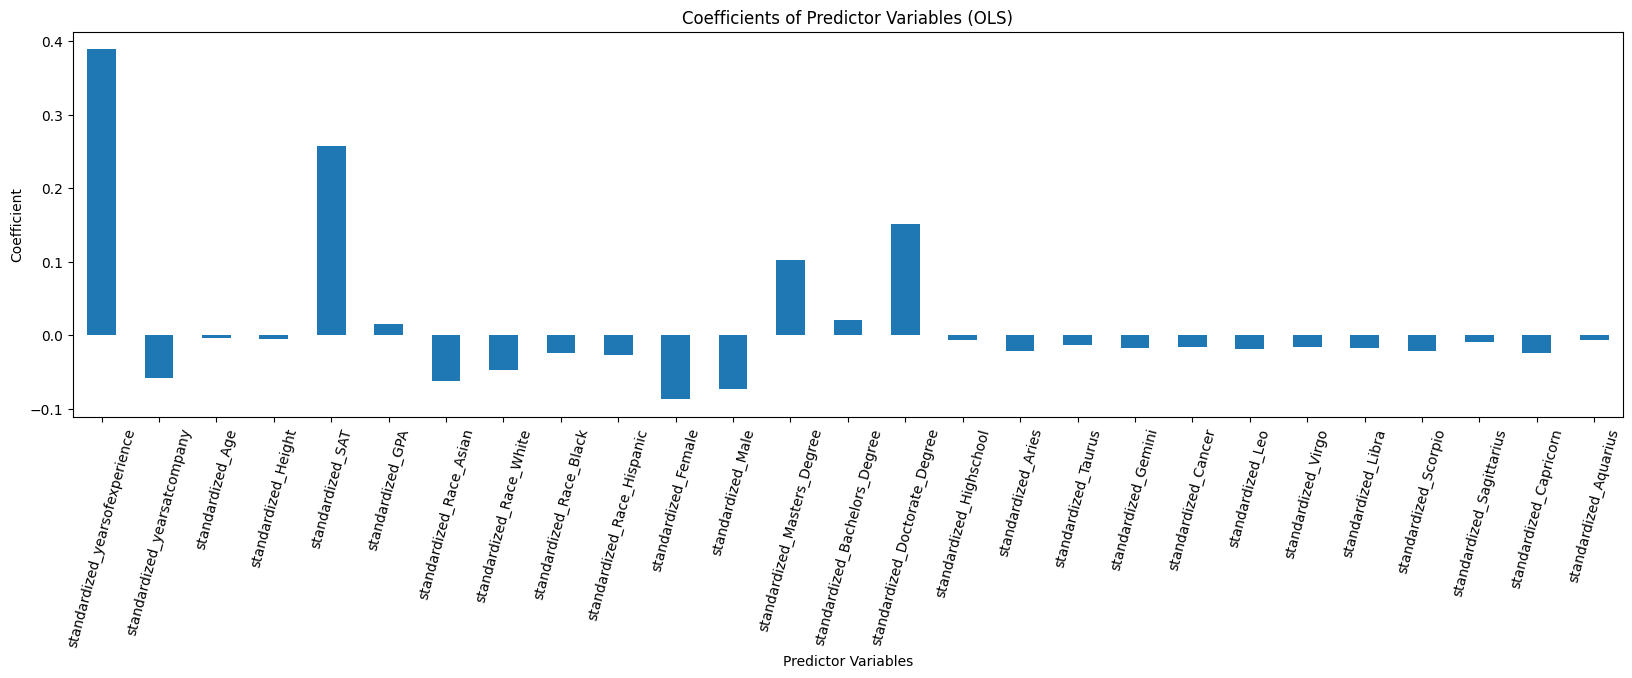

In [26]:
# Plot the coefficients of the predictor variables
coefficients1.plot(kind='bar')  
plt.xlabel('Predictor Variables')
plt.ylabel('Coefficient')
plt.title('Coefficients of Predictor Variables (OLS)')
plt.xticks(rotation = 75)
plt.gcf().set_size_inches(20, 5)
plt.show()

r squared values

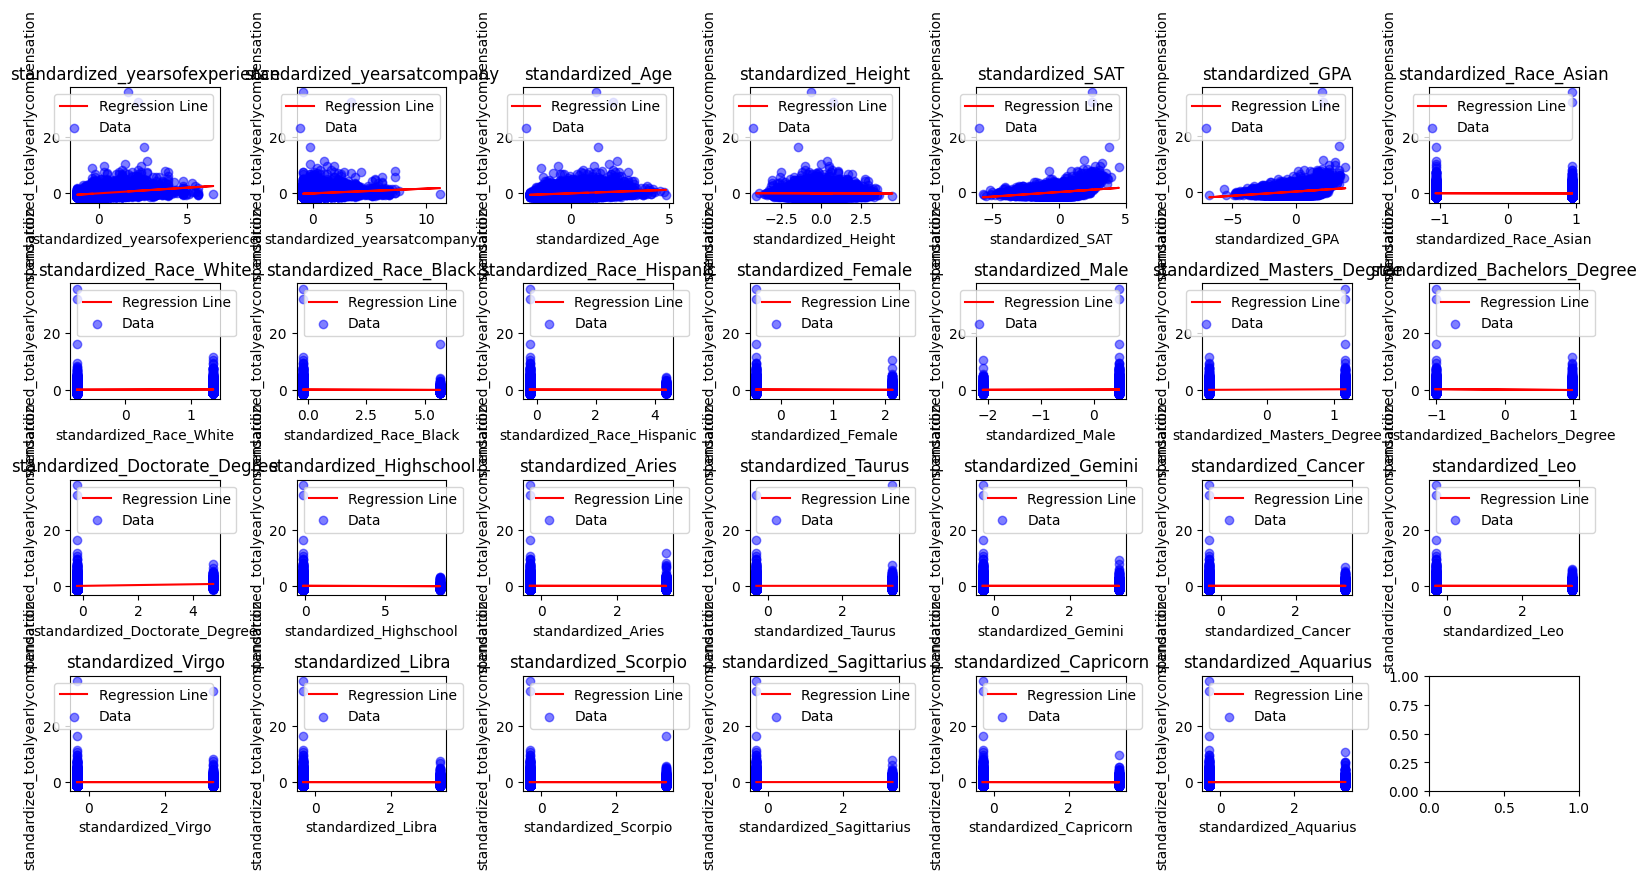

In [27]:
# Create a list to store the R-squared values
r_squared_values1 = []

# Create subplots
fig, axes = plt.subplots(4, 7, figsize=(16, 8))

# Flatten the axes for easier iteration
axes = axes.flatten()

# Loop through each predictor variable
for i, var in enumerate(predict_vars4):
    # Prepare the data
    X = df6[var].values.reshape(-1, 1)
    y = df6['standardized_totalyearlycompensation']
    
    # Fit linear regression model
    model = LinearRegression()
    model.fit(X, y)
    
    # Predict y values
    y_pred = model.predict(X)
    
    # Plot scatter plot and regression line
    ax = axes[i]
    ax.scatter(X, y, color='blue', alpha=0.5, label='Data')
    ax.plot(X, y_pred, color='red', label='Regression Line')
    ax.set_xlabel(var)
    ax.set_ylabel('standardized_totalyearlycompensation')
    ax.legend()
    
    # Calculate R-squared
    r_squared = r2_score(y, y_pred)
    r_squared_values1.append(r_squared)
    ax.set_title(f'{var}')

plt.tight_layout()
plt.show()

In [28]:
# Prepare the data
X1 = df6[predict_vars4]
y1 = df6['standardized_totalyearlycompensation']

# Fit multiple linear regression model
multiple_model = LinearRegression()
multiple_model.fit(X1, y1)

# Predict y values
y1_pred_multiple = multiple_model.predict(X1)

# Calculate RMSE for multiple regression model
rmse_multiple = np.sqrt(mean_squared_error(y1, y1_pred_multiple))
print("RMSE for multiple regression model:", rmse_multiple)

# Calculate R-squared for multiple regression model
r_squared_multiple = r2_score(y1, y1_pred_multiple)
print("R-squared for multiple regression model:", r_squared_multiple)

# Compare R-squared values with the individual linear regression models
print("R-squared values for individual predictor variables:")
for i, var in enumerate(predict_vars4):
    print(f"{var}: {r_squared_values1[i]}")

RMSE for multiple regression model: 0.8561735085811909
R-squared for multiple regression model: 0.266966923203773
R-squared values for individual predictor variables:
standardized_yearsofexperience: 0.1621334613427048
standardized_yearsatcompany: 0.02818500458851092
standardized_Age: 0.06474417322866954
standardized_Height: 0.00013707828289266644
standardized_SAT: 0.11071695461350872
standardized_GPA: 0.0932610964556061
standardized_Race_Asian: 0.0013775293278427414
standardized_Race_White: 0.0021683358383558504
standardized_Race_Black: 0.0005068907818849278
standardized_Race_Hispanic: 9.926125455772539e-05
standardized_Female: 0.0015334101327397764
standardized_Male: 0.0013134572585734583
standardized_Masters_Degree: 0.009745222582788426
standardized_Bachelors_Degree: 0.023977599220711743
standardized_Doctorate_Degree: 0.01970937950108176
standardized_Highschool: 0.00015703251254206574
standardized_Aries: 1.678081766731676e-05
standardized_Taurus: 8.242060388297112e-06
standardized_Ge

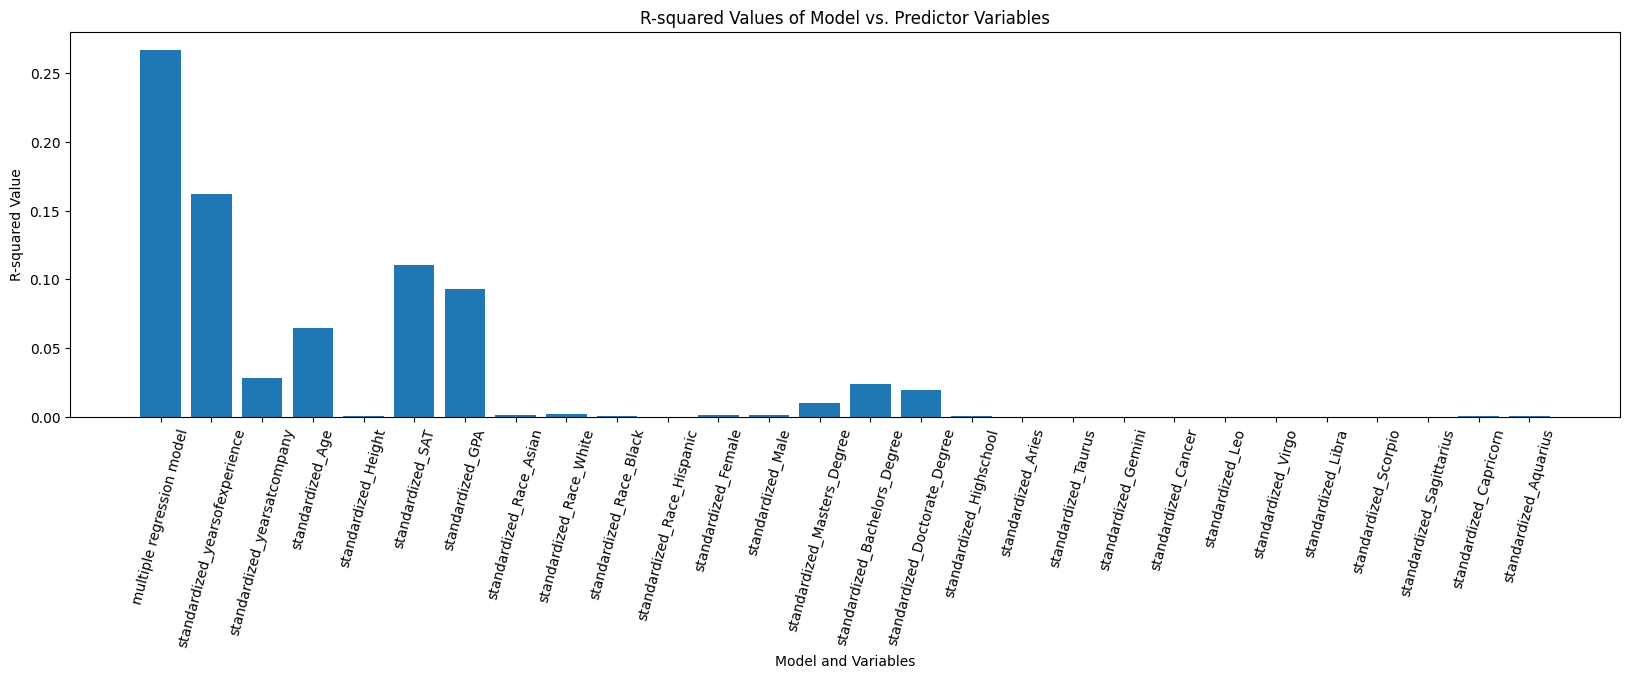

In [29]:
# plot a histogram of the R-squared values
# x axis is the model and the names of the variables
# y axis is the R-squared values for the model and the variables
x_axis1 = ['multiple regression model'] + predict_vars4
y_axis1 = [r_squared_multiple] + r_squared_values1

plt.bar(x_axis1, y_axis1)

plt.xlabel('Model and Variables')
plt.ylabel('R-squared Value')
plt.title('R-squared Values of Model vs. Predictor Variables')
plt.xticks(rotation = 75)
plt.gcf().set_size_inches(20, 5)
plt.show()

# Question 2

Do #1 again but with train test split to calculate the rsquared value for comparison

In [30]:
# Prepare the data
X1 = df6[predict_vars4]
y1 = df6['standardized_totalyearlycompensation']

# Split the data into training and testing sets
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=3959)

# Fit multiple linear regression model on the training data
multiple_model = LinearRegression()
multiple_model.fit(X1_train, y1_train)

# Predict y values using the trained model
y1_test_pred = multiple_model.predict(X1_test)

# Calculate RMSE for the test set
rmse1_test = np.sqrt(mean_squared_error(y1_test, y1_test_pred))
print("RMSE for multiple linear regression model:", rmse1_test)

# Calculate R-squared for the test set
r_squared1_test = r2_score(y1_test, y1_test_pred)
print("R-squared for multiple linear regression model:", r_squared1_test)

RMSE for multiple linear regression model: 0.7714707627243933
R-squared for multiple linear regression model: 0.2872959080726456


Ridge regression for each single predictor variable like in #1

In [31]:
# Create a list to store the R-squared values
r_squared_values2 = []

# Define the parameter grid for lambda (alpha)
param_grid2 = {'alpha': np.logspace(-3, 3, 100)}  # Range of alpha values for tuning

print('R-squared values for ridge regression model:')

# Loop through each predictor variable
for i, var in enumerate(predict_vars4):
    # Prepare the data
    X = df6[var].values.reshape(-1, 1)
    y = df6['standardized_totalyearlycompensation']

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3959)

    # Perform grid search cross-validation to find the optimal lambda value
    ridge = Ridge()
    grid_search = GridSearchCV(ridge, param_grid2, cv=5, scoring='neg_mean_squared_error')
    grid_search.fit(X_train, y_train)

    # Get the optimal lambda value
    optimal_lambda = grid_search.best_params_['alpha']
    
    # Fit the ridge regression model with the optimal alpha
    ridge_model = Ridge(alpha=optimal_lambda)
    ridge_model.fit(X_train, y_train)
    y_pred_ridge = ridge_model.predict(X_test)
    
    # Calculate the r-squared value
    r_squared_ridge = ridge_model.score(X_test, y_test)
    r_squared_values2.append(r_squared_ridge)
    print(f"{var}: {r_squared_values2[i]}")

R-squared values for ridge regression model:
standardized_yearsofexperience: 0.17538490930326345
standardized_yearsatcompany: 0.037234457704934276
standardized_Age: 0.06893382752776489
standardized_Height: 1.2677841795705191e-05
standardized_SAT: 0.12696678705189213
standardized_GPA: 0.1092190278536127
standardized_Race_Asian: 0.0002528884291431721
standardized_Race_White: -0.0008578660891249701
standardized_Race_Black: -0.0006019129736347661
standardized_Race_Hispanic: -0.00020753423903818735
standardized_Female: 0.0023609677440541432
standardized_Male: 0.0021502624654288205
standardized_Masters_Degree: 0.0092588724846282
standardized_Bachelors_Degree: 0.023609817605735106
standardized_Doctorate_Degree: 0.0245897952388493
standardized_Highschool: 0.0003030425743665299
standardized_Aries: -0.0006258353041019848
standardized_Taurus: -0.0003494700012216523
standardized_Gemini: -0.00010925319305576942
standardized_Cancer: -0.00011263090478341731
standardized_Leo: 6.658201171405587e-06
sta

Ridge regression for multiple variables

In [32]:
# Ridge Regression
X2 = df6[predict_vars4]  # Independent variables
y2 = df6['standardized_totalyearlycompensation']  # Dependent variable

# Split the data into training and testing sets
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=3959)

# Perform grid search cross-validation to find the optimal lambda value
ridge2 = Ridge()
grid_search2 = GridSearchCV(ridge2, param_grid2, cv=5, scoring='neg_mean_squared_error')
grid_search2.fit(X2_train, y2_train)

# Get the optimal lambda value
optimal_lambda2 = grid_search2.best_params_['alpha']
print("Optimal lambda:", optimal_lambda2)

Optimal lambda: 46.41588833612782


In [33]:
# Fit the ridge regression model with the optimal alpha
ridge_model = Ridge(alpha=optimal_lambda2)
ridge_model.fit(X2_train, y2_train)
y2_pred_ridge = ridge_model.predict(X2_test)

# Calculate the mean squared error
mse_ridge = mean_squared_error(y2_test, y2_pred_ridge)
rmse_ridge = np.sqrt(mse_ridge)
print("RMSE for ridge regression model:", rmse_ridge)

# Calculate the r-squared value
r_squared_ridge = ridge_model.score(X2_test, y2_test)
print("R-squared for ridge regression model:", r_squared_ridge)

RMSE for ridge regression model: 0.7713750536183724
R-squared for ridge regression model: 0.2874727340615607


In [34]:
print("RMSE for multiple linear regression model:", rmse1_test)
print("R-squared for multiple linear regression model:", r_squared1_test)

print("RMSE for ridge regression model:", rmse_ridge)
print("R-squared for ridge regression model:", r_squared_ridge)

RMSE for multiple linear regression model: 0.7714707627243933
R-squared for multiple linear regression model: 0.2872959080726456
RMSE for ridge regression model: 0.7713750536183724
R-squared for ridge regression model: 0.2874727340615607


In [35]:
# Print the coefficients of the ridge regression model
print("Coefficients of the ridge regression model:")
for i, var in enumerate(predict_vars4):
    print(f"{var}: {ridge_model.coef_[i]}")

Coefficients of the ridge regression model:
standardized_yearsofexperience: 0.3957771082306744
standardized_yearsatcompany: -0.06698504316546162
standardized_Age: -0.001990935698520084
standardized_Height: -0.007418814239906982
standardized_SAT: 0.25515052770212565
standardized_GPA: 0.01894263569607794
standardized_Race_Asian: -0.06735778266764762
standardized_Race_White: -0.04336771700833016
standardized_Race_Black: -0.02821932993081594
standardized_Race_Hispanic: -0.027149428675883474
standardized_Female: -0.0798437231687432
standardized_Male: -0.06906600522889682
standardized_Masters_Degree: 0.09611352107182067
standardized_Bachelors_Degree: 0.008315906265366484
standardized_Doctorate_Degree: 0.14515902781014448
standardized_Highschool: -0.006454252642124647
standardized_Aries: -0.02681501067657674
standardized_Taurus: -0.010063962314698905
standardized_Gemini: -0.017519354991999043
standardized_Cancer: -0.01899645785704977
standardized_Leo: -0.019361983245033694
standardized_Virgo:

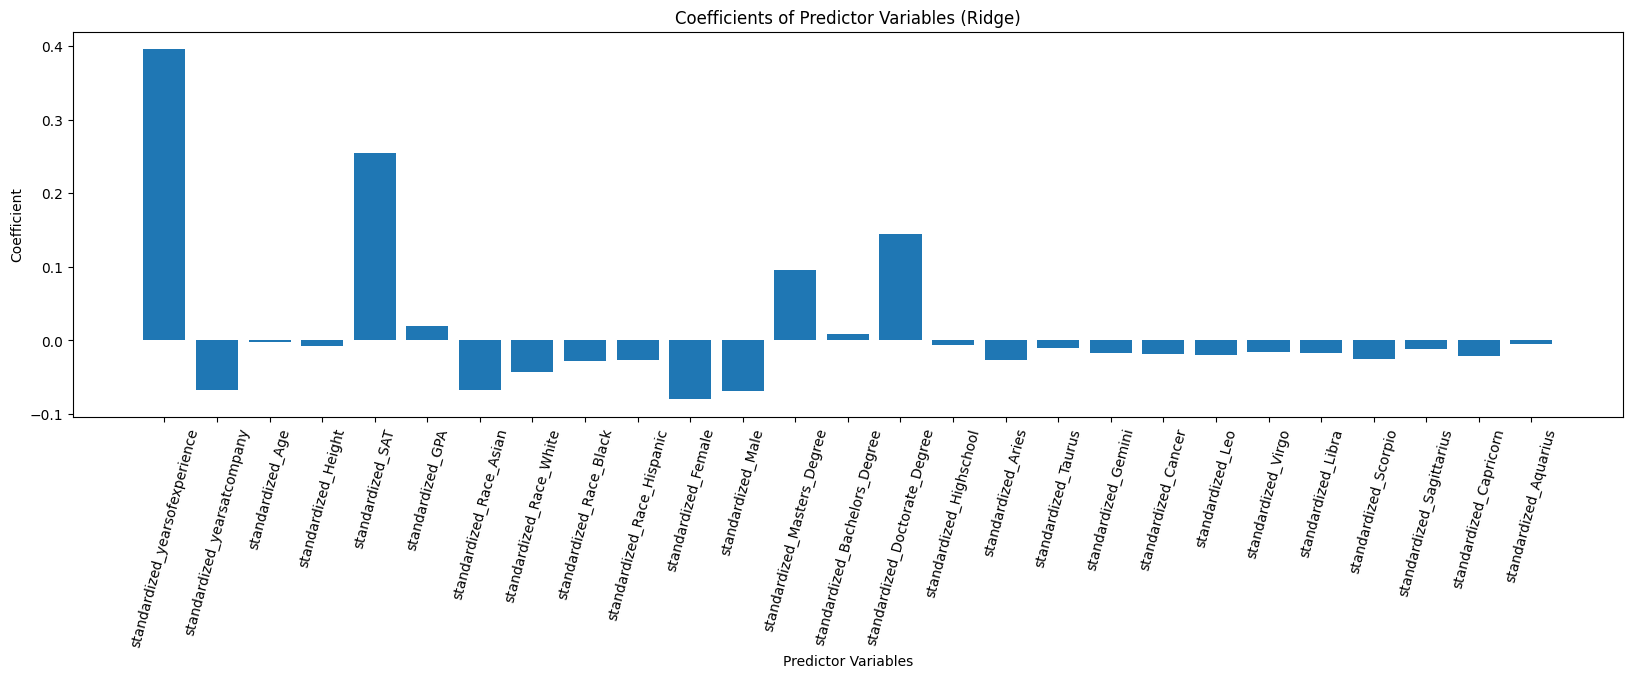

In [36]:
# Plot the coefficients of the ridge regression model
plt.bar(predict_vars4, ridge_model.coef_)

plt.xlabel('Predictor Variables')
plt.ylabel('Coefficient')
plt.title('Coefficients of Predictor Variables (Ridge)')
plt.xticks(rotation = 75)
plt.gcf().set_size_inches(20, 5)
plt.show()

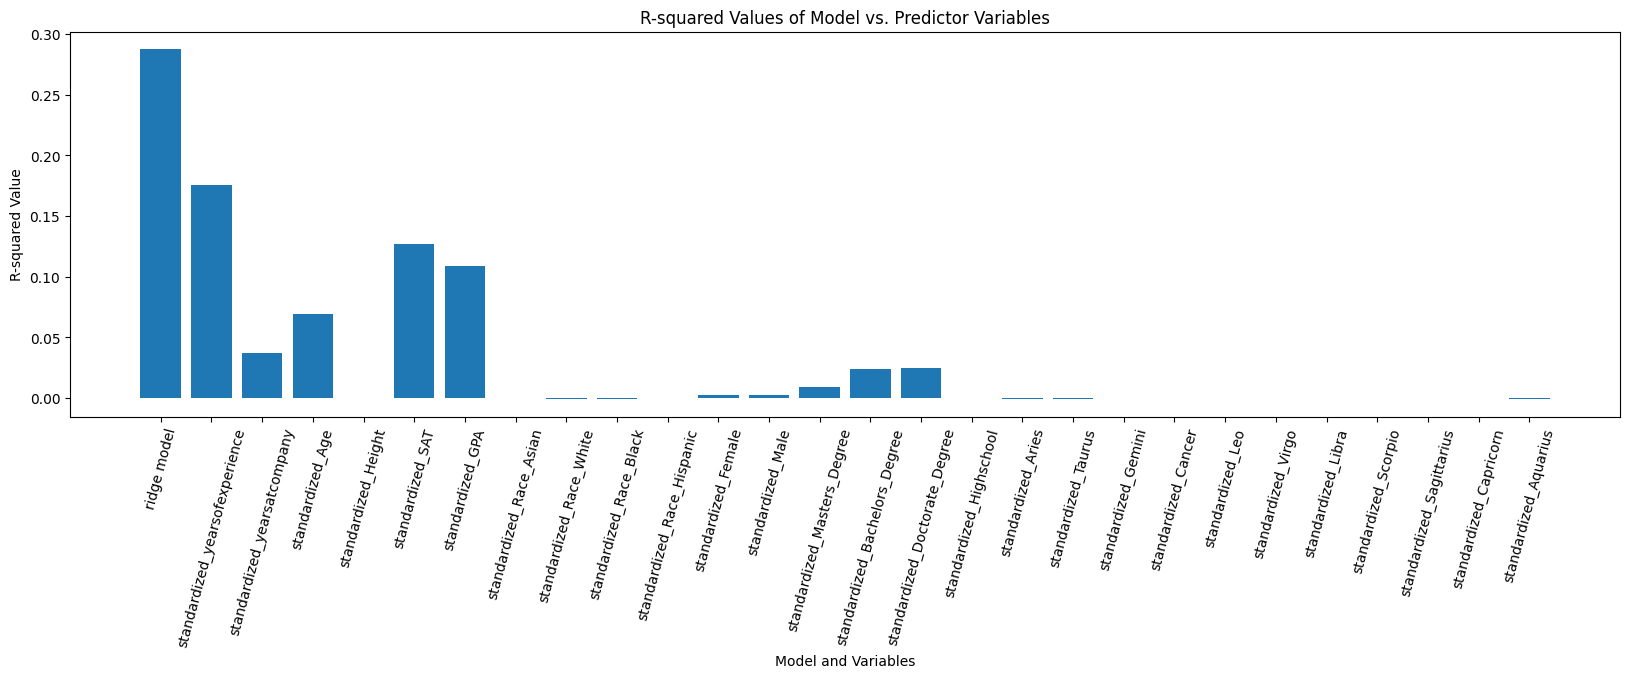

In [37]:
# Plot a histogram of the R-squared values
# x axis is the model and the names of the variables
# y axis is the R-squared values for the model and the variables
x_axis2 = ['ridge model'] + predict_vars4
y_axis2 = [r_squared_ridge] + r_squared_values2

plt.bar(x_axis2, y_axis2)

plt.xlabel('Model and Variables')
plt.ylabel('R-squared Value')
plt.title('R-squared Values of Model vs. Predictor Variables')
plt.xticks(rotation = 75)
plt.gcf().set_size_inches(20, 5)
plt.show()

Optmal lambda

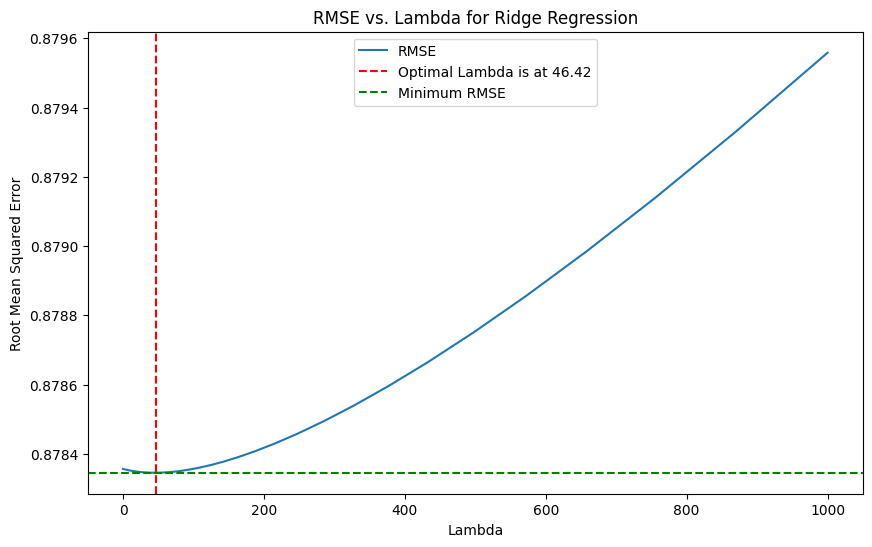

In [38]:
# Prepare to store the RMSE for each lambda
rmse_values2 = []
lambdas2 = np.logspace(-3, 3, 100)

# Perform 5-fold cross-validation for each lambda
for alpha in lambdas2:
    ridge = Ridge(alpha=alpha)
    mse = -cross_val_score(ridge, X2_train, y2_train, scoring='neg_mean_squared_error', cv=5)
    rmse = np.sqrt(mse.mean())
    rmse_values2.append(rmse)

# Plot the RMSE values
plt.figure(figsize=(10, 6))
plt.plot(lambdas2, rmse_values2, label='RMSE')

# Plot a vertical line at the minimum RMSE value
plt.axvline(x=optimal_lambda2, color='r', linestyle='--', label=f'Optimal Lambda is at {optimal_lambda2:.2f}')

# Find the minimum RMSE value
min_rmse2 = min(rmse_values2)

# Plot a horizontal line at the minimum RMSE value
plt.axhline(y=min_rmse2, color='g', linestyle='--', label=f'Minimum RMSE')

plt.xlabel('Lambda')
plt.ylabel('Root Mean Squared Error')
plt.title('RMSE vs. Lambda for Ridge Regression')
plt.legend()
plt.show()


In [39]:
# Find the corresponding lambda at minimum RMSE
min_lambda2 = lambdas2[rmse_values2.index(min_rmse2)]
print("Optimal lambda from minimum RMSE:", min_lambda2)

Optimal lambda from minimum RMSE: 46.41588833612782


# Question 3

In [40]:
print("RMSE for multiple linear regression model:", rmse1_test)
print("R-squared for multiple linear regression model:", r_squared1_test)

print("RMSE for ridge regression model:", rmse_ridge)
print("R-squared for ridge regression model:", r_squared_ridge)

RMSE for multiple linear regression model: 0.7714707627243933
R-squared for multiple linear regression model: 0.2872959080726456
RMSE for ridge regression model: 0.7713750536183724
R-squared for ridge regression model: 0.2874727340615607


Lssso regression for each single predictor variable like in #1

In [41]:
# Create a list to store the R-squared values
r_squared_values3 = []

# Define the parameter grid for lambda (alpha)
param_grid3 = {'alpha': np.logspace(-5, 5, 100)}  # Range of alpha values for tuning

print('R-squared values for lasso regression model:')

# Loop through each predictor variable
for i, var in enumerate(predict_vars4):
    # Prepare the data
    X = df6[var].values.reshape(-1, 1)
    y = df6['standardized_totalyearlycompensation']

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3959)
    
    # Perform grid search cross-validation to find the optimal lambda value
    lasso = Lasso()
    grid_search = GridSearchCV(lasso, param_grid3, cv=5, scoring='neg_mean_squared_error')
    grid_search.fit(X_train, y_train)

    # Get the optimal lambda value
    optimal_lambda = grid_search.best_params_['alpha']
    
    # Fit the lasso regression model with the optimal alpha
    lasso_model = Lasso(alpha=optimal_lambda)
    lasso_model.fit(X_train, y_train)
    y_pred_lasso = lasso_model.predict(X_test)
    
    # Calculate the r-squared value
    r_squared_lasso = lasso_model.score(X_test, y_test)
    r_squared_values3.append(r_squared_lasso)
    print(f"{var}: {r_squared_values3[i]}")

R-squared values for lasso regression model:
standardized_yearsofexperience: 0.17537111338060019
standardized_yearsatcompany: 0.037263869371658376
standardized_Age: 0.06892114899021529
standardized_Height: 9.966795654237082e-06
standardized_SAT: 0.12694850825114046
standardized_GPA: 0.10922024972740274
standardized_Race_Asian: 0.00016920397098696416
standardized_Race_White: -0.0010290958640357672
standardized_Race_Black: -0.0006837683647404891
standardized_Race_Hispanic: -0.00022409998665628983
standardized_Female: 0.002413591168317075
standardized_Male: 0.0022064202277198852
standardized_Masters_Degree: 0.00925745045548687
standardized_Bachelors_Degree: 0.023602974103735574
standardized_Doctorate_Degree: 0.024590092266169705
standardized_Highschool: -0.00010867779301415581
standardized_Aries: -0.0006435966765705459
standardized_Taurus: -0.00010867779301415581
standardized_Gemini: -0.00010867779301415581
standardized_Cancer: -0.00010867779301415581
standardized_Leo: -0.0001086777930141

Lasso regression for multiple variables

In [42]:
# Lasso Regression
X3 = df6[predict_vars4]  # Independent variables
y3 = df6['standardized_totalyearlycompensation']  # Dependent variable

# Split the data into training and testing sets
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.2, random_state=3959)

# Perform grid search cross-validation to find the optimal lambda value
lasso3 = Lasso()
grid_search3 = GridSearchCV(lasso3, param_grid3, cv=5, scoring='neg_mean_squared_error')
grid_search3.fit(X3_train, y3_train)

# Get the optimal lambda value
optimal_lambda3 = grid_search3.best_params_['alpha']
print("Optimal lambda:", optimal_lambda3)

Optimal lambda: 6.428073117284319e-05


In [43]:
# Fit the lasso regression model with the optimal alpha
lasso_model = Lasso(alpha=optimal_lambda3)
lasso_model.fit(X3_train, y3_train)
y3_pred_lasso = lasso_model.predict(X3_test)

# Calculate the mean squared error
mse_lasso = mean_squared_error(y3_test, y3_pred_lasso)
rmse_lasso = np.sqrt(mse_lasso)
print("RMSE for lasso regression model:", rmse_lasso)

# Calculate the r-squared value
r_squared_lasso = lasso_model.score(X3_test, y3_test)
print("R-squared for lasso regression model:", r_squared_lasso)

RMSE for lasso regression model: 0.7714501068106385
R-squared for lasso regression model: 0.28733407246690135


In [44]:
print("RMSE for multiple linear regression model:", rmse1_test)
print("R-squared for multiple linear regression model:", r_squared1_test)

print("RMSE for ridge regression model:", rmse_ridge)
print("R-squared for ridge regression model:", r_squared_ridge)

print("RMSE for lasso regression model:", rmse_lasso)
print("R-squared for lasso regression model:", r_squared_lasso)

RMSE for multiple linear regression model: 0.7714707627243933
R-squared for multiple linear regression model: 0.2872959080726456
RMSE for ridge regression model: 0.7713750536183724
R-squared for ridge regression model: 0.2874727340615607
RMSE for lasso regression model: 0.7714501068106385
R-squared for lasso regression model: 0.28733407246690135


In [45]:
# Print the coefficients of the lasso regression model
print("Coefficients of the lasso regression model:")
for i, var in enumerate(predict_vars4):
    print(f"{var}: {lasso_model.coef_[i]}")

Coefficients of the lasso regression model:
standardized_yearsofexperience: 0.39787685188270877
standardized_yearsatcompany: -0.0679109239931099
standardized_Age: -0.002893419270043467
standardized_Height: -0.007376499463524178
standardized_SAT: 0.2587253962277093
standardized_GPA: 0.01553610435027161
standardized_Race_Asian: -0.06835363339316274
standardized_Race_White: -0.04433082487475523
standardized_Race_Black: -0.028503096652860306
standardized_Race_Hispanic: -0.027555527354388175
standardized_Female: -0.0874112841613477
standardized_Male: -0.07664161146591396
standardized_Masters_Degree: 0.10123084065967604
standardized_Bachelors_Degree: 0.013461134210815946
standardized_Doctorate_Degree: 0.14752991967605444
standardized_Highschool: -0.005290964263273052
standardized_Aries: -0.02666443100995111
standardized_Taurus: -0.009846361189024534
standardized_Gemini: -0.01736918792486141
standardized_Cancer: -0.018839781991379485
standardized_Leo: -0.019182343378341418
standardized_Virgo:

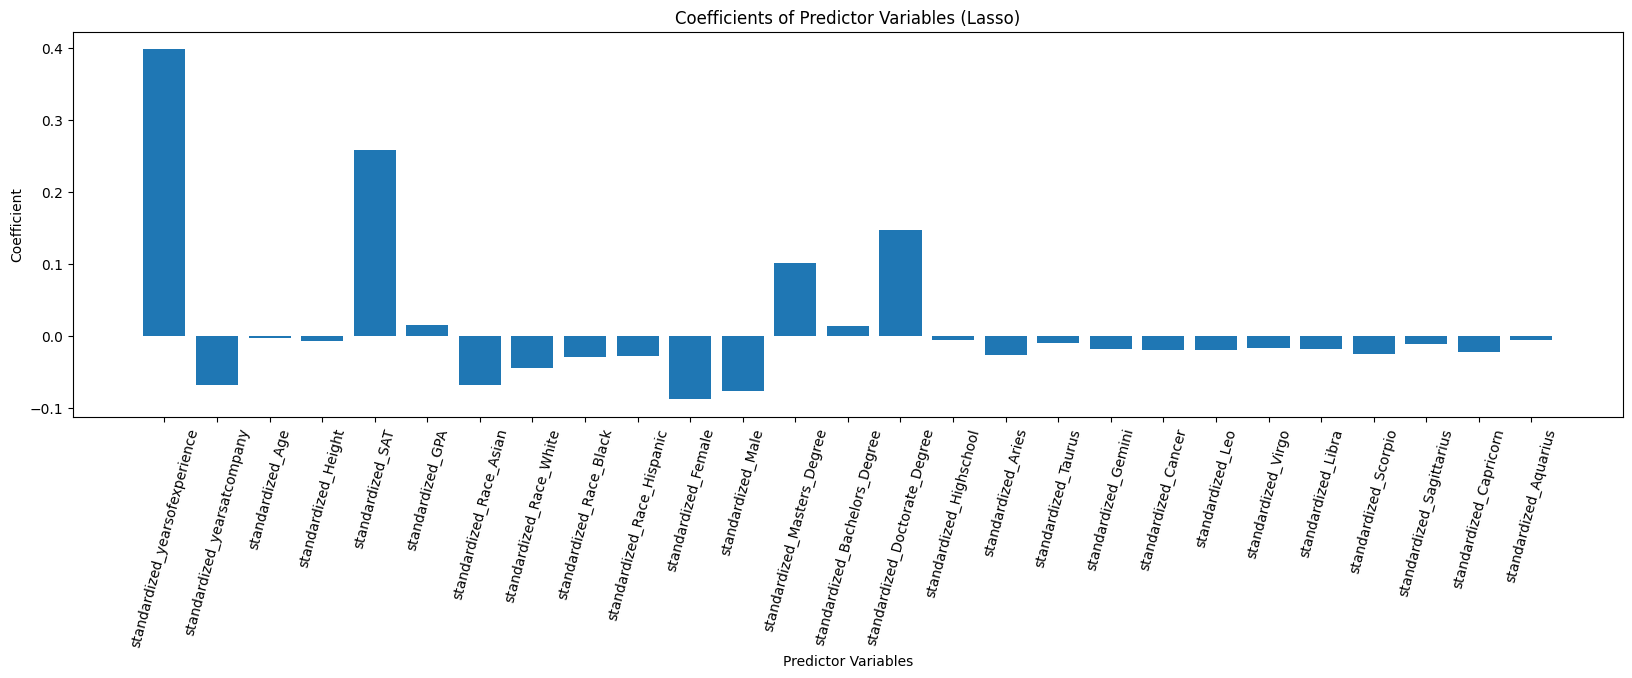

In [46]:
# Plot the coefficients of the lasso regression model
plt.bar(predict_vars4, lasso_model.coef_)

plt.xlabel('Predictor Variables')
plt.ylabel('Coefficient')
plt.title('Coefficients of Predictor Variables (Lasso)')
plt.xticks(rotation = 75)
plt.gcf().set_size_inches(20, 5)
plt.show()

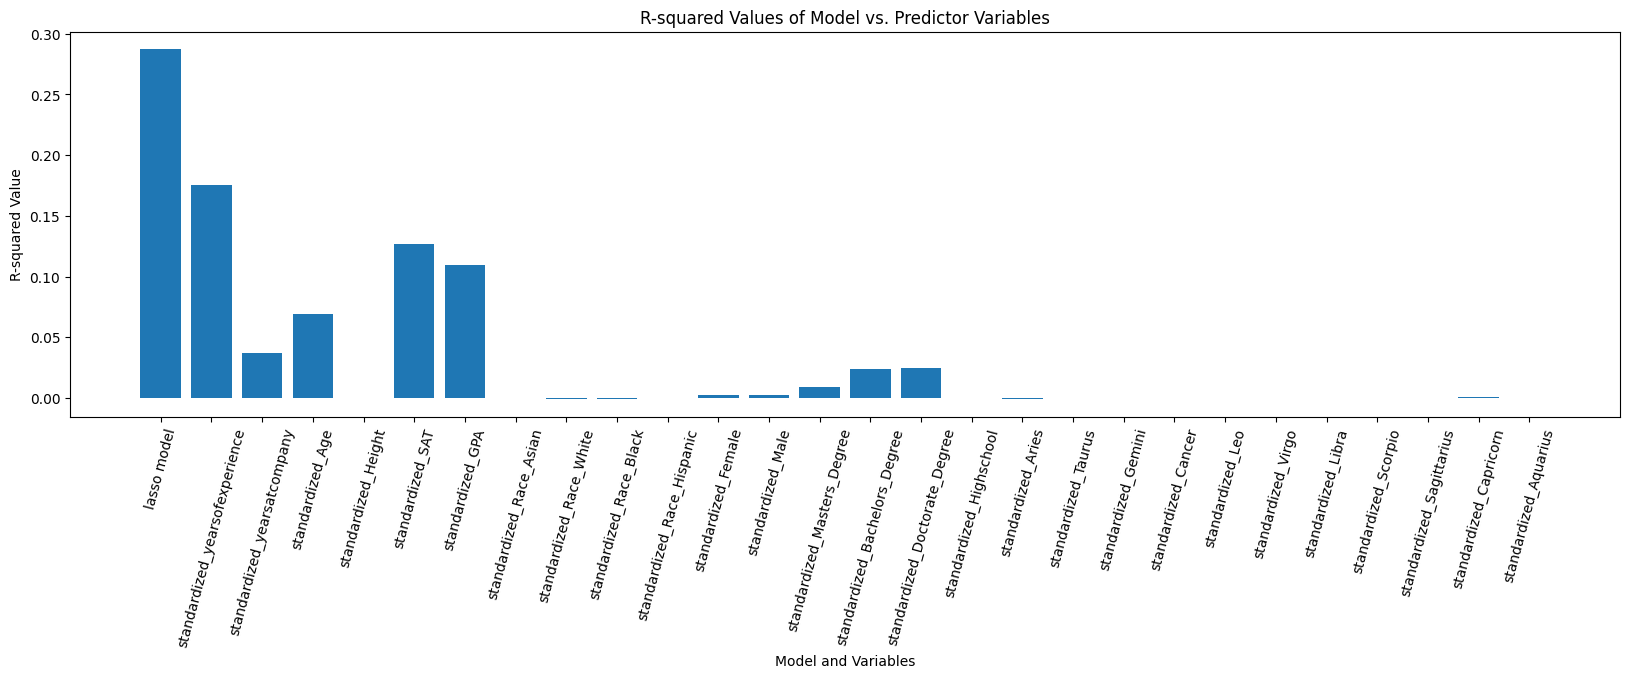

In [47]:
# Plot a histogram of the R-squared values
# x axis is the model and the names of the variables
# y axis is the R-squared values for the model and the variables
x_axis3 = ['lasso model'] + predict_vars4
y_axis3 = [r_squared_lasso] + r_squared_values3

plt.bar(x_axis3, y_axis3)

plt.xlabel('Model and Variables')
plt.ylabel('R-squared Value')
plt.title('R-squared Values of Model vs. Predictor Variables')
plt.xticks(rotation = 75)
plt.gcf().set_size_inches(20, 5)
plt.show()

Optimal lambda

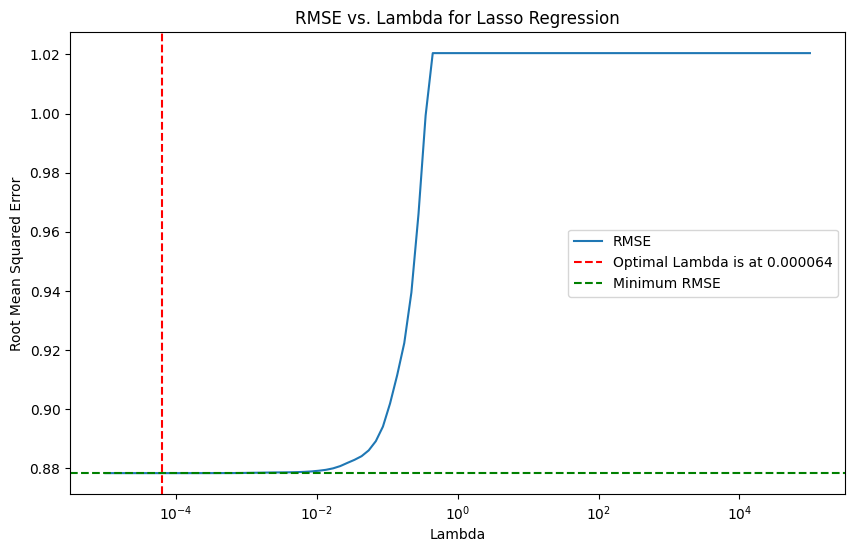

In [48]:
# Prepare to store the RMSE for each lambda
rmse_values3 = []
lambdas3 = np.logspace(-5, 5, 100)

# Perform 5-fold cross-validation for each lambda
for alpha in lambdas3:
    lasso = Lasso(alpha=alpha)
    mse = -cross_val_score(lasso, X3_train, y3_train, scoring='neg_mean_squared_error', cv=5)
    rmse = np.sqrt(mse.mean())
    rmse_values3.append(rmse)

# Plot the RMSE values
plt.figure(figsize=(10, 6))
plt.plot(lambdas3, rmse_values3, label='RMSE')

# Plot a vertical line at the minimum RMSE value
plt.axvline(x=optimal_lambda3, color='r', linestyle='--', label=f'Optimal Lambda is at {optimal_lambda3:.6f}')

# Find the minimum RMSE value
min_rmse3 = min(rmse_values3)

# Plot a horizontal line at the minimum RMSE value
plt.axhline(y=min_rmse3, color='g', linestyle='--', label=f'Minimum RMSE')

plt.xlabel('Lambda')
plt.xscale('log')
plt.ylabel('Root Mean Squared Error')
plt.title('RMSE vs. Lambda for Lasso Regression')
plt.legend()
plt.show()

In [49]:
# Find the corresponding lambda at minimum RMSE
min_lambda3 = lambdas3[rmse_values3.index(min_rmse3)]
print("Optimal lambda from minimum RMSE:", min_lambda3)

Optimal lambda from minimum RMSE: 6.428073117284319e-05


# Question 4

In [50]:
df7['gender_num'].value_counts()

gender_num
0    17603
1     3880
Name: count, dtype: int64

In [51]:
# Splitting the DataFrame into separate DataFrames for males and females
males = df7[df7['gender_num'] == 0]
females = df7[df7['gender_num'] == 1]

# Randomly selecting an equal number of males
num_males_to_keep = min(len(males), len(females))
selected_males = males.sample(n=num_males_to_keep, random_state=3959)

# Concatenating selected males with females
df_balanced = pd.concat([selected_males, females])

# Now df_balanced contains an equal number of males and females
df_balanced['gender_num'].value_counts()

gender_num
0    3880
1    3880
Name: count, dtype: int64

In [52]:
predict_vars4

['standardized_yearsofexperience',
 'standardized_yearsatcompany',
 'standardized_Age',
 'standardized_Height',
 'standardized_SAT',
 'standardized_GPA',
 'standardized_Race_Asian',
 'standardized_Race_White',
 'standardized_Race_Black',
 'standardized_Race_Hispanic',
 'standardized_Female',
 'standardized_Male',
 'standardized_Masters_Degree',
 'standardized_Bachelors_Degree',
 'standardized_Doctorate_Degree',
 'standardized_Highschool',
 'standardized_Aries',
 'standardized_Taurus',
 'standardized_Gemini',
 'standardized_Cancer',
 'standardized_Leo',
 'standardized_Virgo',
 'standardized_Libra',
 'standardized_Scorpio',
 'standardized_Sagittarius',
 'standardized_Capricorn',
 'standardized_Aquarius']

In [53]:
predict_vars5 = predict_vars4.copy()
predict_vars5.remove('standardized_Male')
predict_vars5.remove('standardized_Female')
predict_vars5.append('standardized_totalyearlycompensation')
predict_vars5

['standardized_yearsofexperience',
 'standardized_yearsatcompany',
 'standardized_Age',
 'standardized_Height',
 'standardized_SAT',
 'standardized_GPA',
 'standardized_Race_Asian',
 'standardized_Race_White',
 'standardized_Race_Black',
 'standardized_Race_Hispanic',
 'standardized_Masters_Degree',
 'standardized_Bachelors_Degree',
 'standardized_Doctorate_Degree',
 'standardized_Highschool',
 'standardized_Aries',
 'standardized_Taurus',
 'standardized_Gemini',
 'standardized_Cancer',
 'standardized_Leo',
 'standardized_Virgo',
 'standardized_Libra',
 'standardized_Scorpio',
 'standardized_Sagittarius',
 'standardized_Capricorn',
 'standardized_Aquarius',
 'standardized_totalyearlycompensation']

**The confusion matrix**:
$$
C = \begin{bmatrix}
\text{Predict 0, Actual 0} & \text{Predict 0, Actual 1}\\
\text{Predict 1, Actual 0} & \text{Predict 1, Actual 1}
\end{bmatrix}
$$

**Accuracy** is the percentage of all correctly classified examples in our test set.  
$$
\textrm{Accuracy} = \frac{C_{00} + C_{11}}{C_{00} + C_{01} + C_{10} + C_{11}}
$$

#### Precision Score
The precision score is the percentage
$$
\text{Precision}_0 = \frac{C_{00}}{C_{00} + C_{01}}
$$

$$
\text{Precision}_1 = \frac{C_{11}}{C_{11} + C_{10}}
$$
which is the proportion of actual cases of one type out of all cases of our prediction of that type. In other words, how many are actually true among all trues that we predict?

#### Recall Score
The recall score is the percentage
$$
\textrm{Recall}_0 = \frac{C_{00}}{C_{00} + C_{10}}
$$
$$
\textrm{Recall}_1 = \frac{C_{11}}{C_{11} + C_{01}}
$$
which is the proportion of predicted cases of one type out of all actual cases of that type. In other words, how many trues are correctly predicted among all actual trues?


In [54]:
# Prepare the dataset for logistic regression
X4 = df_balanced[predict_vars5]
y4 = df_balanced['gender_num']

# Split the data into training and testing sets
X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y4, test_size=0.2, random_state=3959)

In [55]:
# Prepare the dataset for logistic regression
X4 = df_balanced[predict_vars5]
y4 = df_balanced['gender_num']

# Split the data into training and testing sets
X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y4, test_size=0.2, random_state=3959)

# Fit the logistic regression model
without_control = LogisticRegression().fit(X4_train[['standardized_totalyearlycompensation']], y4_train)
with_control = LogisticRegression().fit(X4_train, y4_train)

y4_pred_without_control = without_control.predict(X4_test[['standardized_totalyearlycompensation']])
y4_pred_with_control = with_control.predict(X4_test)

In [56]:
print('Logistic Regression Model without Control:')
print('Confusion Matrix:')
print(confusion_matrix(y4_test, y4_pred_without_control))
print('Accuracy:', without_control.score(X4_test[['standardized_totalyearlycompensation']], y4_test))
print('Precision:', precision_score(y4_test, y4_pred_without_control))
print('Recall:', recall_score(y4_test, y4_pred_without_control))
print('Coefficient/beta:', without_control.coef_)

Logistic Regression Model without Control:
Confusion Matrix:
[[287 509]
 [256 500]]
Accuracy: 0.5070876288659794
Precision: 0.49554013875123887
Recall: 0.6613756613756614
Coefficient/beta: [[-0.16349406]]


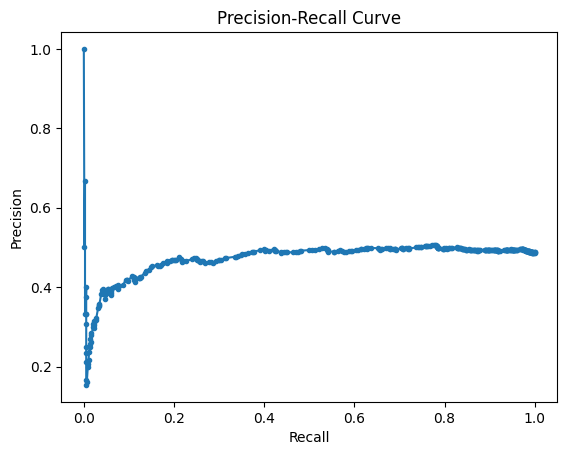

In [57]:
# Precision-Recall Curve
precision, recall, thresholds = precision_recall_curve(y4_test, without_control.predict_proba(X4_test[['standardized_totalyearlycompensation']])[:,1])

plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

In [58]:
print('Logistic Regression Model with Control:')
print('Confusion Matrix:')
print(confusion_matrix(y4_test, y4_pred_with_control))
print('Accuracy:', with_control.score(X4_test, y4_test))
print('Precision:', precision_score(y4_test, y4_pred_with_control))
print('Recall:', recall_score(y4_test, y4_pred_with_control))
print('Coefficient/beta:')
for i, var in enumerate(predict_vars5):
    print(f"{var}: {with_control.coef_[0][i]}")

Logistic Regression Model with Control:
Confusion Matrix:
[[330 466]
 [279 477]]
Accuracy: 0.5199742268041238
Precision: 0.5058324496288441
Recall: 0.6309523809523809
Coefficient/beta:
standardized_yearsofexperience: -0.07064164878688703
standardized_yearsatcompany: -0.0756110828102875
standardized_Age: -0.042690867762891625
standardized_Height: -0.002309496867840411
standardized_SAT: -0.021708735611908142
standardized_GPA: 0.026512675501557073
standardized_Race_Asian: -0.09917393037819854
standardized_Race_White: -0.11258264081359037
standardized_Race_Black: 0.021406687148541003
standardized_Race_Hispanic: -0.09325339064071576
standardized_Masters_Degree: 0.3056584036922231
standardized_Bachelors_Degree: 0.27366721057772636
standardized_Doctorate_Degree: 0.042205712325542134
standardized_Highschool: -0.12437602557614841
standardized_Aries: -0.020694332624798212
standardized_Taurus: -0.020422541285622677
standardized_Gemini: -0.028272406557467447
standardized_Cancer: -0.006903389426335

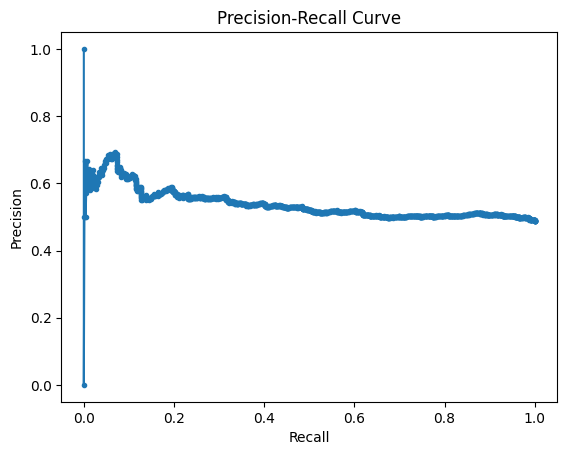

In [59]:
# Precision-Recall curve
precision, recall, thresholds = precision_recall_curve(y4_test, with_control.predict_proba(X4_test)[:,1])

plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()


# Question 5

In [60]:
predict_vars5

['standardized_yearsofexperience',
 'standardized_yearsatcompany',
 'standardized_Age',
 'standardized_Height',
 'standardized_SAT',
 'standardized_GPA',
 'standardized_Race_Asian',
 'standardized_Race_White',
 'standardized_Race_Black',
 'standardized_Race_Hispanic',
 'standardized_Masters_Degree',
 'standardized_Bachelors_Degree',
 'standardized_Doctorate_Degree',
 'standardized_Highschool',
 'standardized_Aries',
 'standardized_Taurus',
 'standardized_Gemini',
 'standardized_Cancer',
 'standardized_Leo',
 'standardized_Virgo',
 'standardized_Libra',
 'standardized_Scorpio',
 'standardized_Sagittarius',
 'standardized_Capricorn',
 'standardized_Aquarius',
 'standardized_totalyearlycompensation']

In [61]:
predict_vars6 = predict_vars5.copy()
predict_vars6 = predict_vars6[:6]
predict_vars6

['standardized_yearsofexperience',
 'standardized_yearsatcompany',
 'standardized_Age',
 'standardized_Height',
 'standardized_SAT',
 'standardized_GPA']

Logistic regression for each variable to predict pay

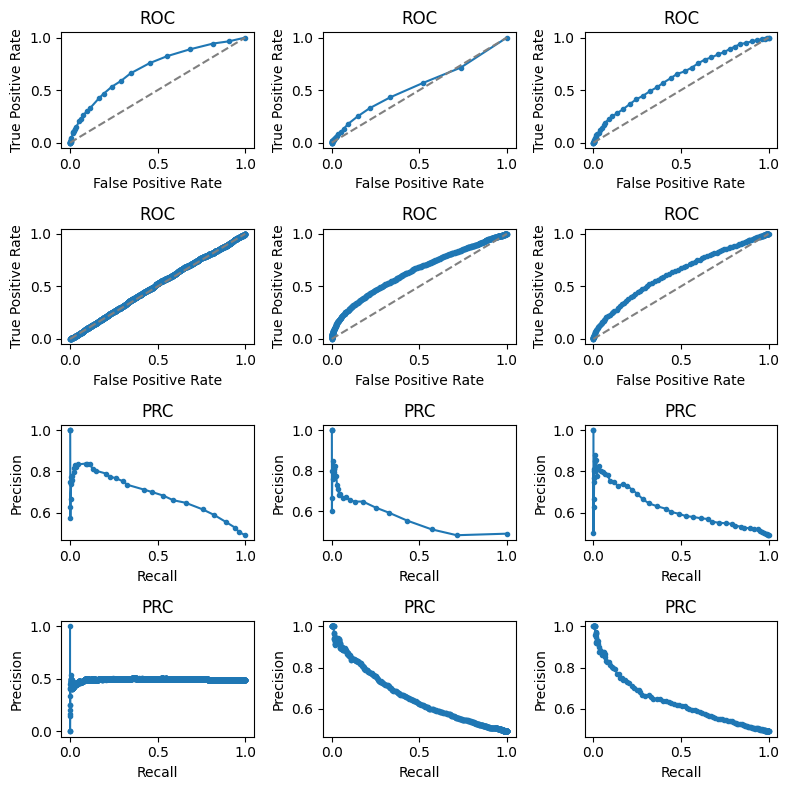

In [62]:
# Create an array to store the metric values
# Confusion matrix is column 1
# Accuracy is column 2
# Precision is column 3
# Recall is column 4
# Coefficient/beta is column 5
metric_values = np.zeros((len(predict_vars6), 5), dtype=object)

# Create subplots
fig, axes = plt.subplots(4, 3, figsize=(8, 8))

# Flatten the axes for easier iteration
axes = axes.flatten()

for i, var in enumerate(predict_vars6):
    X = df8[var].values.reshape(-1, 1)
    y = df8['higher']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3959)
    model = LogisticRegression().fit(X_train, y_train)
    y_pred = model.predict(X_test)

    metric_values[i, 0] = confusion_matrix(y_test, y_pred)
    metric_values[i, 1] = model.score(X_test, y_test)
    metric_values[i, 2] = precision_score(y_test, y_pred)
    metric_values[i, 3] = recall_score(y_test, y_pred)
    metric_values[i, 4] = model.coef_

    # ROC curve
    ax2 = axes[i]
    fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
    roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:,1])
    ax2.plot(fpr, tpr, marker='.', label=f'AUC = {roc_auc:.2f}')
    ax2.set_xlabel('False Positive Rate')
    ax2.set_ylabel('True Positive Rate')
    ax2.set_title('ROC')
    ax2.plot([0, 1], [0, 1], linestyle='--', color='gray')

    # Precision-Recall curve
    ax1 = axes[i+6]
    precision, recall, thresholds = precision_recall_curve(y_test, model.predict_proba(X_test)[:,1])
    ax1.plot(recall, precision, marker='.')
    ax1.set_xlabel('Recall')
    ax1.set_ylabel('Precision')
    ax1.set_title('PRC')

plt.tight_layout()
plt.show()

In [63]:
# Print the metric values
print('Confusion Matrix:')
for i, var in enumerate(predict_vars6):
    print(var+':')
    print(metric_values[i, 0])

Confusion Matrix:
standardized_yearsofexperience:
[[1556  639]
 [ 869 1241]]
standardized_yearsatcompany:
[[1462  733]
 [1199  911]]
standardized_Age:
[[1322  873]
 [ 911 1199]]
standardized_Height:
[[ 821 1374]
 [ 740 1370]]
standardized_SAT:
[[1238  957]
 [ 776 1334]]
standardized_GPA:
[[1245  950]
 [ 802 1308]]


In [64]:
print('Accuracy:')
for i, var in enumerate(predict_vars6):
    print(f"{var}: {metric_values[i, 1]}")

Accuracy:
standardized_yearsofexperience: 0.6497096399535424
standardized_yearsatcompany: 0.551219512195122
standardized_Age: 0.5855981416957027
standardized_Height: 0.5089430894308943
standardized_SAT: 0.597444831591173
standardized_GPA: 0.5930313588850175


In [65]:
print('Precision:')
for i, var in enumerate(predict_vars6):
    print(f"{var}: {metric_values[i, 2]}")

Precision:
standardized_yearsofexperience: 0.6601063829787234
standardized_yearsatcompany: 0.5541362530413625
standardized_Age: 0.5786679536679536
standardized_Height: 0.49927113702623904
standardized_SAT: 0.5822784810126582
standardized_GPA: 0.579273693534101


In [66]:
print('Recall:')
for i, var in enumerate(predict_vars6):
    print(f"{var}: {metric_values[i, 3]}")

Recall:
standardized_yearsofexperience: 0.5881516587677725
standardized_yearsatcompany: 0.4317535545023697
standardized_Age: 0.5682464454976304
standardized_Height: 0.6492890995260664
standardized_SAT: 0.6322274881516587
standardized_GPA: 0.6199052132701421


In [67]:
print('Coefficient/beta:')
for i, var in enumerate(predict_vars6):
    print(f"{var}: {metric_values[i, 4]}")

Coefficient/beta:
standardized_yearsofexperience: [[0.79375328]]
standardized_yearsatcompany: [[0.28069968]]
standardized_Age: [[0.43744198]]
standardized_Height: [[-0.0073443]]
standardized_SAT: [[0.49284891]]
standardized_GPA: [[0.44048824]]


# Extra Credit 1

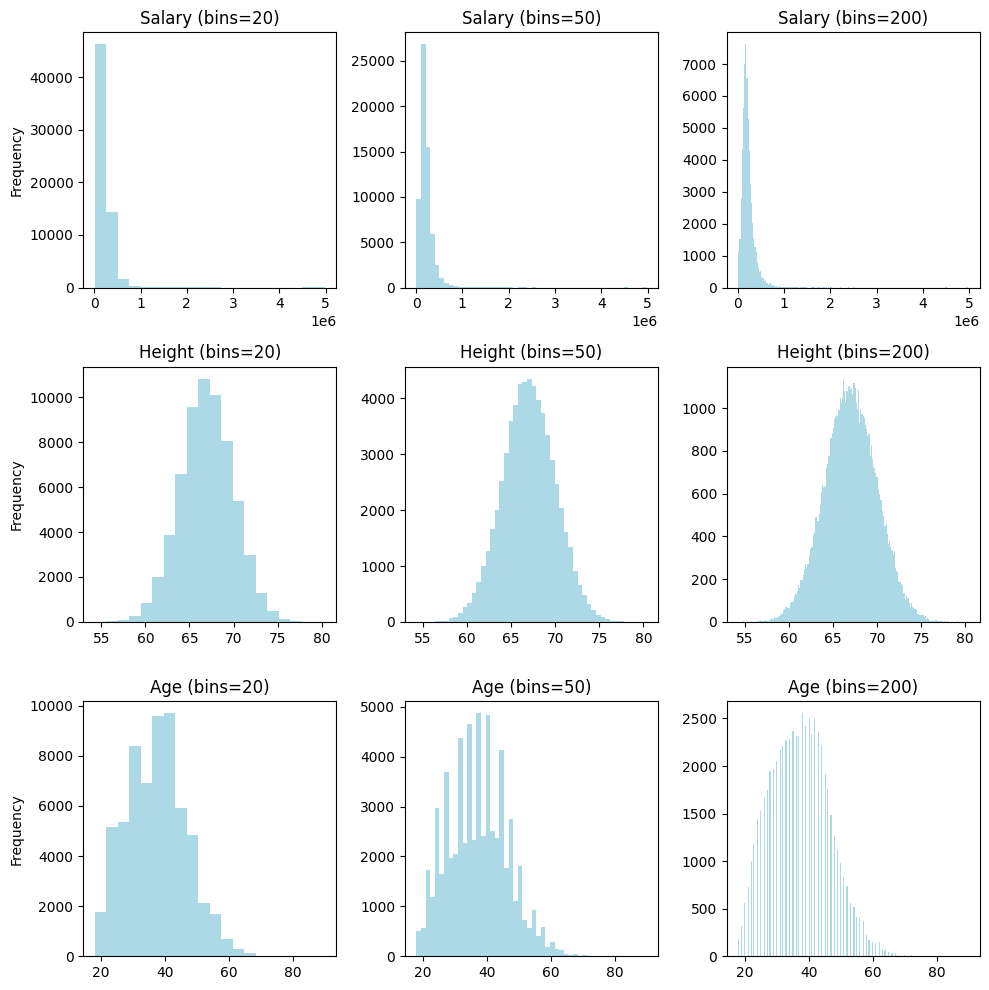

In [68]:
vars = ['totalyearlycompensation', 'Height', 'Age']
titles = ['Salary', 'Height', 'Age']
# Plot histogram and line graph for each variable
fig, axes = plt.subplots(3, 3, figsize=(10, 10))

for i, var in enumerate(vars):
    ax1 = axes[i, 0]
    ax1.hist(df[var], bins=20, color='lightblue')
    ax1.set_ylabel('Frequency')
    ax1.set_title(titles[i]+' (bins=20)')

    ax2 = axes[i, 1]
    ax2.hist(df[var], bins=50, color='lightblue')
    ax2.set_title(titles[i]+' (bins=50)')

    ax3 = axes[i, 2]
    ax3.hist(df[var], bins=200, color='lightblue')
    ax3.set_title(titles[i]+' (bins=200)')

plt.tight_layout()
plt.show()

# Extra Credit 2

In [69]:
# show how many elements are in the list
zodiacs = list(zodiac_signs.values())
print(zodiacs)

['Aries', 'Taurus', 'Gemini', 'Cancer', 'Leo', 'Virgo', 'Libra', 'Scorpio', 'Sagittarius', 'Capricorn', 'Aquarius', 'Pisces']


In [70]:
standardized_zodiacs = ["standardized_" + name for name in zodiacs]
print(standardized_zodiacs)

['standardized_Aries', 'standardized_Taurus', 'standardized_Gemini', 'standardized_Cancer', 'standardized_Leo', 'standardized_Virgo', 'standardized_Libra', 'standardized_Scorpio', 'standardized_Sagittarius', 'standardized_Capricorn', 'standardized_Aquarius', 'standardized_Pisces']


In [71]:
# Create a list to store the R-squared values
r_squared_values_ec2_dropped_one = []

# Iterate through to drop each zodiac and do multiple linear regression with the remaining
for i, zodiac in enumerate(standardized_zodiacs):
    zodiac_dropped_one = standardized_zodiacs.copy()
    zodiac_dropped_one.remove(zodiac)
    X = df6[zodiac_dropped_one]
    y = df6['standardized_totalyearlycompensation']
    X = sm.add_constant(X)
    model = sm.OLS(y, X).fit()
    r_squared_values_ec2_dropped_one.append(model.rsquared)

# Print the R-squared values
for i, zodiac in enumerate(zodiacs):
    print('Without '+zodiac+':', r_squared_values_ec2_dropped_one[i])

Without Aries: 0.0007589770649597538
Without Taurus: 0.0007589770649609751
Without Gemini: 0.0007589770649609751
Without Cancer: 0.0007589770649610861
Without Leo: 0.0007589770649609751
Without Virgo: 0.0007589770649609751
Without Libra: 0.0007589770649609751
Without Scorpio: 0.0007589770649619743
Without Sagittarius: 0.000758977064960642
Without Capricorn: 0.0007589770649623073
Without Aquarius: 0.0007589770649599759
Without Pisces: 0.0007589770649594207


In [72]:
# Print the R-squared values from small to large
sorted_r_squared_values_ec2_dropped_one = sorted(r_squared_values_ec2_dropped_one)
for i, r_squared in enumerate(sorted_r_squared_values_ec2_dropped_one):
    print(f"{'Without'} {zodiacs[r_squared_values_ec2_dropped_one.index(r_squared)]}: {r_squared}")

Without Pisces: 0.0007589770649594207
Without Aries: 0.0007589770649597538
Without Aquarius: 0.0007589770649599759
Without Sagittarius: 0.000758977064960642
Without Taurus: 0.0007589770649609751
Without Taurus: 0.0007589770649609751
Without Taurus: 0.0007589770649609751
Without Taurus: 0.0007589770649609751
Without Taurus: 0.0007589770649609751
Without Cancer: 0.0007589770649610861
Without Scorpio: 0.0007589770649619743
Without Capricorn: 0.0007589770649623073


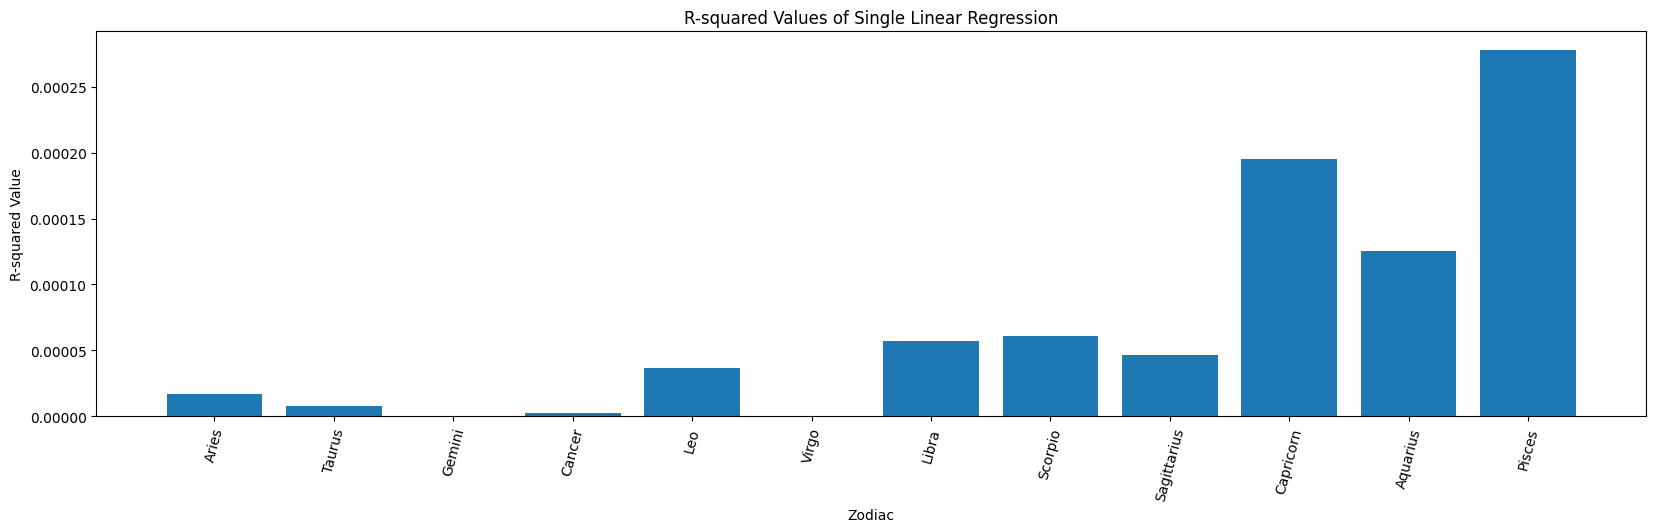

In [73]:
# Create a list to store the R-squared values
r_squared_values_ec2_single = []

# Iterate through each zodiac to do single linear regression
for i, zodiac in enumerate(standardized_zodiacs):
    X = df6[zodiac].values.reshape(-1, 1)
    y = df6['standardized_totalyearlycompensation']
    model = LinearRegression()
    model.fit(X, y)
    y_pred = model.predict(X)
    r_squared = r2_score(y, y_pred)
    r_squared_values_ec2_single.append(r_squared)

# Plot the R-squared values
plt.bar(zodiacs, r_squared_values_ec2_single)
plt.xlabel('Zodiac')
plt.ylabel('R-squared Value')
plt.title('R-squared Values of Single Linear Regression')
plt.xticks(rotation = 75)
plt.gcf().set_size_inches(20, 5)
plt.show()